# Random Forest Model
`Random Forest` is a supervised machine learning model that is used for both classification and regression tasks. It is a collection of decision trees that work together to make predictions.

`Types` of Random Forests:
1. Bagging
2. Bosting
3. stacking

In [22]:
# import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,RandomForestRegressor
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score,confusion_matrix,classification_report
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder
from sklearn.metrics import mean_squared_error,r2_score,mean_squared_error
# library for spliting data
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')

In [23]:
# load data set
df = sns.load_dataset('tips')
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [24]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

In [25]:
# encode features which object and category type
for col in df.columns:
    if df[col].dtype == 'object' or df[col].dtype == 'category':
        df[col] = LabelEncoder().fit_transform(df[col])
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,0,0,2,0,2
1,10.34,1.66,1,0,2,0,3
2,21.01,3.50,1,0,2,0,3
3,23.68,3.31,1,0,2,0,2
4,24.59,3.61,0,0,2,0,4


In [26]:
# split the data into x and t for classification
x = df.drop(['sex'],axis=1)
y = df['sex']

In [27]:
# Train test split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [28]:
# create model
model = RandomForestClassifier(n_estimators=100)
model.fit(x_train,y_train)

RandomForestClassifier()

In [29]:
# train the model 
model.fit(x_train,y_train)

RandomForestClassifier()

In [30]:
# predict 
y_pred = model.predict(x_test)
y_pred

array([0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1])

In [35]:
# evaluate the model
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.46      0.32      0.38        19
           1       0.64      0.77      0.70        30

    accuracy                           0.59        49
   macro avg       0.55      0.54      0.54        49
weighted avg       0.57      0.59      0.57        49

[[ 6 13]
 [ 7 23]]
0.5918367346938775


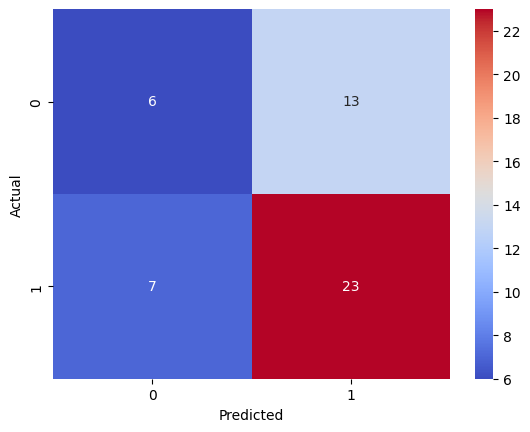

In [36]:
# plot confusion matrix
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True, fmt='d', cmap='coolwarm')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Random Forest Regressor